In [13]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from os.path import join as j
from datetime import datetime

DIR = "/home/rave/biophysics-course-2019/Processed_Flux_Tower_Data"
coyote_path = j(DIR,"coyote_bush_site")
grass_path = j(DIR,"grass_site")

def read_and_tidy(path):
    """Makes a datetime column for plotting and time series analysis. 
    Also shifts by 8 hours to Pacific time, this needs to be checked 
    against non tower data."""
    
    name_rows = pd.read_csv(path, skiprows=17, header=-1).iloc[0:2]
    name_row = name_rows.iloc[0,:] + " (" + name_rows.iloc[1,:] + ")"
    df = pd.read_csv(path, skiprows=19, names= name_row)
    df['HRMIN (HRMIN)'] = df['HRMIN (HRMIN)'].astype(str).apply(lambda x: x.zfill(4))
    df.index = pd.to_datetime(df['YEAR (YEAR)'].astype(str) + df['DOY (DOY)'].astype(str) + df['HRMIN (HRMIN)'].astype(str), format='%Y%j%H%M')
    return df

In [14]:
coyote = read_and_tidy(j(coyote_path, "eddypro_adv_ameriflux_2019-03-28T081423_adv.csv"))

In [15]:
grass = read_and_tidy(j(grass_path, "eddypro_adv_ameriflux_2019-03-28T081623_adv.csv"))

The hottest time of day is usually around 4pm because of the balance between upwelling infrared radiation and convection of heat away from ~1.5 meters above the surface. Our tower data agrees pretty well with each other and Dar's Airstrip site.

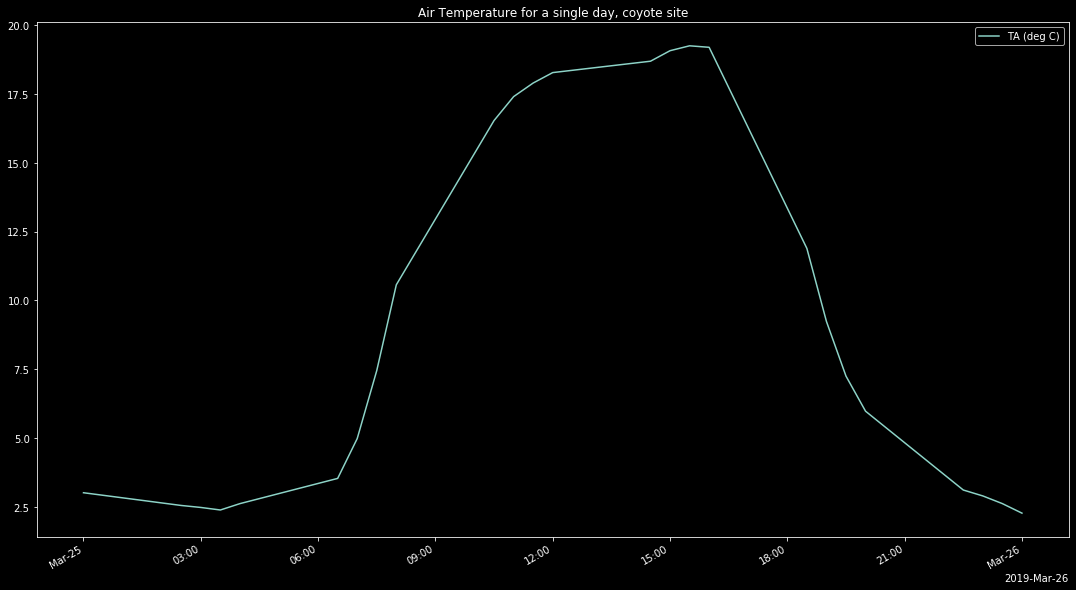

In [54]:
def plot_nice_date(df, site_name, y):
    
    plt.style.use('dark_background')

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)


    df.shift(-8, freq ='H')\
        .loc[datetime(year = 2019, month = 3, day = 25):datetime(year = 2019, month = 3, day = 26)]\
        .plot(ax =ax, y = y)

    ax.set_title('Air Temperature for a single day, ' + site_name+' site')
plot_nice_date(coyote, "coyote", "TA (deg C)")

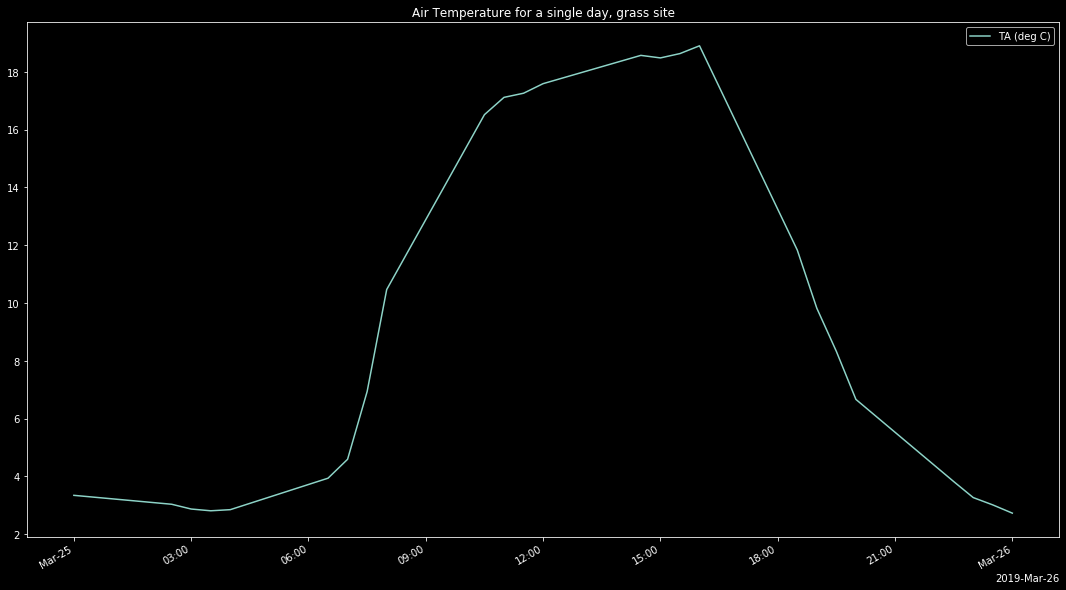

In [55]:
plot_nice_date(grass, "grass", "TA (deg C)")

In [56]:
airstrip = pd.read_csv("Processed_Flux_Tower_Data/Airstrip-15min.csv", sep="\t")
airstrip.index = pd.to_datetime(airstrip['Time'])

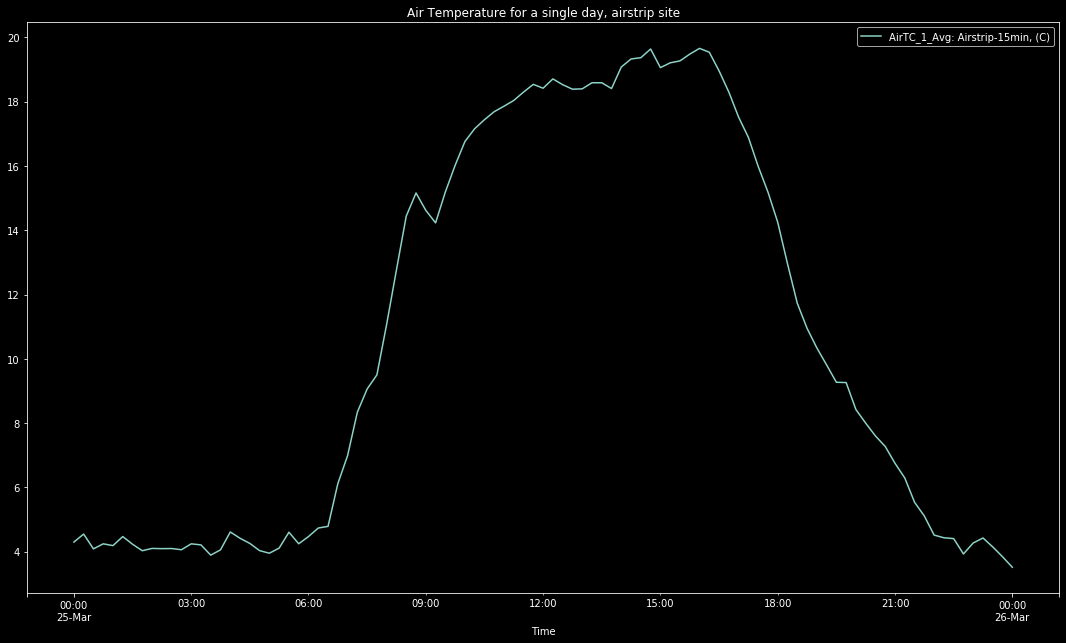

In [57]:
plot_nice_date(airstrip, "airstrip", "AirTC_1_Avg: Airstrip-15min, (C)")

### Next, plot some trends and look at differences between the sites. Maybe do some covariance analysis with different sampling intervals with eddy pro